<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 3)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set  (Life Expectancy data)

The dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. <br> Attribute information: 

**Country:** Name of the country

**Year:** Year the observations were recorded

**Status:** Whether the country is Developed or Developing

**Adult_Mortality:** Mortality rate for age group 15-60 out of every 1000 individuals of the population

**Infant_Deaths:** Number of infant deaths per 1000 population

**Alcohol:** Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

**Hepatitis B:** Hepatitis B (HepB) immunization coverage for 1 year olds (Percentage)

**Measles:** Number of reported cases for measles per 1000 from population

**BMI:** Average Body Mass Index for entire population

**Underfive_Deaths:** Number of deaths under 5 years of age per 1000 population

**Polio:** Polio (Pol3) immunization coverage for 1 year olds (Percentage)

**Diphtheria:** Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage for 1 year olds (Percentage)

**HIV:** Deaths per 1000 live births due to HIV/AIDS (0-4 years)

**GDP:** Gross Domestic Product per capita (in USD)

**Population:** Population of the country

**Malnourished10_19:** Prevalence of malnutrition among children and adolescents for Age 10 to 19 (Percentage)

**Malnourished5_9:** Prevalence of malnutrition among children for Age 5 to 9 (Percentage)

**Income_Index:** Human Development Index (HDI) in terms of national income per capita (index ranging from 0 to 1)

**Schooling:** Number of years of Schooling

**Life_Expectancy:** Life Expectancy in age for the country


##  Table of Content

1. **[Data Preparation](#eda)**
2. **[Linear Regression](#lf)**
3. **[Gradient Descent](#gd)**
4. **[Regularization](#reg)**
5. **[Grid Search](#gs)**

**Import the required libraries**

In [1]:
# type your code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

#### Load the Life expectancy dataset and display the first five records 

In [2]:
# load the csv file
# type your code here
Life=pd.read_csv('C:\\Users\\AVIRAJ\\Downloads\\Life_Expectan.csv')
# display the first five observations

# type your code here
Life.head()

,Country,Year,Status,Adult_Mortality,Infant_Deaths,Alcohol,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,65.0,1154,19.1,83,6,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Albania,2015,Developing,74.0,0,4.60,99.0,0,58.0,0,99,99,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,77.8
2,Algeria,2015,Developing,19.0,21,NaN,95.0,63,59.5,24,95,95,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,75.6
3,Angola,2015,Developing,335.0,66,NaN,64.0,118,23.3,98,7,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,52.4
4,Antigua,2015,Developing,13.0,0,NaN,99.0,0,47.7,0,86,99,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9,76.4


#### Check the shape of the data and display its information

In [3]:
# check the size of the dataframe

# type your code here
Life.shape

(182, 20)

In [4]:
# display dataset information understand the dataset

# type your code here
Life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 20 columns):
Country              182 non-null object
Year                 182 non-null int64
Status               182 non-null object
Adult_Mortality      173 non-null float64
Infant_Deaths        182 non-null int64
Alcohol              15 non-null float64
Hepatitis B          173 non-null float64
Measles              182 non-null int64
BMI                  178 non-null float64
Underfive_Deaths     182 non-null int64
Polio                182 non-null int64
Diphtheria           182 non-null int64
HIV                  182 non-null float64
GDP                  157 non-null float64
Population           141 non-null float64
Malnourished10_19    178 non-null float64
Malnourished5_9      178 non-null float64
Income_Index         169 non-null float64
Schooling            173 non-null float64
Life_Expectancy      173 non-null float64
dtypes: float64(12), int64(6), object(2)
memory usage: 28.6+ KB


### Let's begin with some hands-on practice exercises

<a id="eda"> </a>
## 1. Data Preparation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. The dataset gives the life expectancy for different countries. Check if any information about life expectancy is missing from the given records. How do we fix the problem if present?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
# type your code here
Life['Life_Expectancy'].isnull().sum()

9

As Life Expectancy is a float type feature,we will replace it with the mean of the Life Expectancy column


In [6]:
import scipy.stats as stats
Life['Life_Expectancy']=Life['Life_Expectancy'].fillna(Life['Life_Expectancy'].median())

In [7]:
Life['Life_Expectancy'].isnull().sum()

0

Hence we have successfully replaced the null values at Target Feature.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. How do we handle the missing values from the entire dataset?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
# type your code here
Life.isnull().sum()

Country                0
Year                   0
Status                 0
Adult_Mortality        9
Infant_Deaths          0
Alcohol              167
Hepatitis B            9
Measles                0
BMI                    4
Underfive_Deaths       0
Polio                  0
Diphtheria             0
HIV                    0
GDP                   25
Population            41
Malnourished10_19      4
Malnourished5_9        4
Income_Index          13
Schooling              9
Life_Expectancy        0
dtype: int64

In [9]:
Life['BMI']=Life['BMI'].fillna(np.mean(Life['BMI']))
Life['Income_Index']=Life['Income_Index'].fillna(np.mean(Life['Income_Index']))
Life['Schooling']=Life['Schooling'].fillna(np.mean(Life['Schooling']))


In [10]:
Life.isnull().sum()

Country                0
Year                   0
Status                 0
Adult_Mortality        9
Infant_Deaths          0
Alcohol              167
Hepatitis B            9
Measles                0
BMI                    0
Underfive_Deaths       0
Polio                  0
Diphtheria             0
HIV                    0
GDP                   25
Population            41
Malnourished10_19      4
Malnourished5_9        4
Income_Index           0
Schooling              0
Life_Expectancy        0
dtype: int64

In [11]:
Life['Adult_Mortality']=Life['Adult_Mortality'].fillna(Life['Adult_Mortality'].median())
Life['Hepatitis B']=Life['Hepatitis B'].fillna(Life['Hepatitis B'].median())
Life['GDP']=Life['GDP'].fillna(Life['GDP'].median())
Life['Population']=Life['Population'].fillna(Life['Population'].median())
Life['Malnourished10_19']=Life['Malnourished10_19'].fillna(Life['Malnourished10_19'].median())
Life['Malnourished5_9']=Life['Malnourished5_9'].fillna(Life['Malnourished5_9'].median())

In [12]:
Life.isnull().sum()

Country                0
Year                   0
Status                 0
Adult_Mortality        0
Infant_Deaths          0
Alcohol              167
Hepatitis B            0
Measles                0
BMI                    0
Underfive_Deaths       0
Polio                  0
Diphtheria             0
HIV                    0
GDP                    0
Population             0
Malnourished10_19      0
Malnourished5_9        0
Income_Index           0
Schooling              0
Life_Expectancy        0
dtype: int64

In [13]:
Life=Life.drop(['Alcohol'],axis=1)

#### We have dropped Alcohol as there are more than 95% null values here.Hence not significant for us 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Are there any redundant features in the data?</b>
                </font>
            </div>
        </td>
    </tr>
</table>


Country is a redundant feature as all are unique.


In [14]:
Life['Year'].value_counts()

2015    172
2013     10
Name: Year, dtype: int64

Also Infant deaths & Underfive deaths are similar.Hence they are not contributing & we can drop 1 one of them.

The above features do not contribute to the model and its better we drop them.

In [15]:
Life.columns

Index(['Country', 'Year', 'Status', 'Adult_Mortality', 'Infant_Deaths',
       'Hepatitis B', 'Measles ', 'BMI', 'Underfive_Deaths ', 'Polio',
       'Diphtheria ', 'HIV', 'GDP', 'Population', 'Malnourished10_19',
       'Malnourished5_9', 'Income_Index', 'Schooling', 'Life_Expectancy'],
      dtype='object')

In [16]:
Life=Life.drop(['Country','Year','Infant_Deaths'],axis=1)


In [17]:
Life.columns

Index(['Status', 'Adult_Mortality', 'Hepatitis B', 'Measles ', 'BMI',
       'Underfive_Deaths ', 'Polio', 'Diphtheria ', 'HIV', 'GDP', 'Population',
       'Malnourished10_19', 'Malnourished5_9', 'Income_Index', 'Schooling',
       'Life_Expectancy'],
      dtype='object')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Perform dummy encoding for appropriate variables of the dataset if required</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
# type your code here
df=pd.get_dummies(data=Life,columns=['Status'],drop_first=True)
df.head()

,Adult_Mortality,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy,Status_Developing
0,263.0,65.0,1154,19.1,83,6,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0,1
1,74.0,99.0,0,58.0,0,99,99,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,77.8,1
2,19.0,95.0,63,59.5,24,95,95,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,75.6,1
3,335.0,64.0,118,23.3,98,7,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,52.4,1
4,13.0,99.0,0,47.7,0,86,99,0.2,13566.954100,1977527.0,3.3,3.3,0.784,13.9,76.4,1


<a id="lf"> </a>
## 2. Linear Regression

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5.  Build a full model on the given data. Check whether the obtained residuals have constant variance
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
# type your code here
import statsmodels.api as sm
x=df.drop(['Life_Expectancy'],axis=1)
y=df['Life_Expectancy']
Xc=sm.add_constant(x)
result=sm.OLS(y,Xc).fit()
residuals=result.resid
import statsmodels.stats.api as sms
test=sms.het_goldfeldquandt(y=residuals,x=Xc)
print(test)

(1.200774153764345, 0.21503150590814896, 'increasing')


C:\Users\AVIRAJ\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


H0:Variance is constant across range of data 
Ha:Variance is not constant across range of data

Here p-value <0.05.Hence we cannot reject our null hypothesis.
Hence the Variance is constant across range of data(residuals).


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Build a model to study the impact of immunization on life expectancy, using least squares regression. Find the unexplained variation for the model
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
x=df.iloc[:,[1,5,6]]
y=df.iloc[:,-2]

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
## Fit the model in Linear Regression
model=lr.fit(x,y)

### Capture Predicted values of x
y_pred=model.predict(x)

## Make residuals array by the difference between y & y-prediction
residuals=np.array(y-y_pred)

## Find The unexplained variation
unexplained_variation=np.sum(residuals**2)

print("Unexplained variation for the model=",unexplained_variation)


Unexplained variation for the model= 7611.074540931335


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Build a model to study the impact of malnutrition on life expectancy, using least squares regression. Interpret the coeffients</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
df.head()
x=df.iloc[:,[10,11]]
y=df.iloc[:,-2]


In [22]:
from sklearn.model_selection import train_test_split


In [23]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [24]:
model=sm.OLS(y_train,sm.add_constant(X_train)).fit()

C:\Users\AVIRAJ\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     18.19
Date:                Mon, 14 Sep 2020   Prob (F-statistic):           1.18e-07
Time:                        10:13:19   Log-Likelihood:                -422.50
No. Observations:                 127   AIC:                             851.0
Df Residuals:                     124   BIC:                             859.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                75.9198      0.868     87.461      0.000      74.202      77.638
Malnourished10_19    -0.2991      0.546     -0.547      0.585      -1.381       0.782
Malnourished5_9      -0.5695      0.533     -1.068      0.288      -1.625       0.486
==============================================================================
Omnibus:                        6.691   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                6.495
Skew:                          -0.550   Prob(JB):                       0.0389
Kurtosis:                       3.134   Cond. No.                         12.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Hence the coefficient in the OLS Summary tell the following things-

1)Here 75.9198 represent the life expectancy value considering all other values are 0.
2)Here Malnourished10_19=-0.2991 represent the fact that when there is an unit increase in Malnourishment under 10-19 age,there is an decrease of -0.2291 factor in the life expectancy.
3)Here Malnourished5_9=-0.5695 represent the fact that when there is an unit increase in Malnourishment under 5-9 age,there is an decrease of -0.5695 factor in the life expectancy.


<a id="gd"> </a>
## 3. Gradient Descent

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build a model to study the influence of adult mortality rate on life expectancy using both the least squares regression and gradient descent approach. Are the fits for both the models different?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [26]:
x=df['Adult_Mortality'].values
x=x.reshape(-1,1)
y=df['Life_Expectancy']

In [27]:
# type your code here
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
lr=LinearRegression()
ss=StandardScaler()
x=ss.fit_transform(x)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

#### Model Using Least squares regression

In [28]:
#Xc_train=sm.add_constant(X_train)
lr=LinearRegression()
model=lr.fit(X_train,y_train)
LSR_pred=model.predict(X_train)

#### Model using Stochastic Gradient Descent

In [29]:
sgd = SGDRegressor(random_state=1)
# build the model on train data 
# use fit() to fit the model
linreg_with_SGD = sgd.fit(X_train,y_train)
sgd_pred = linreg_with_SGD.predict(X_train)


No handles with labels found to put in legend.


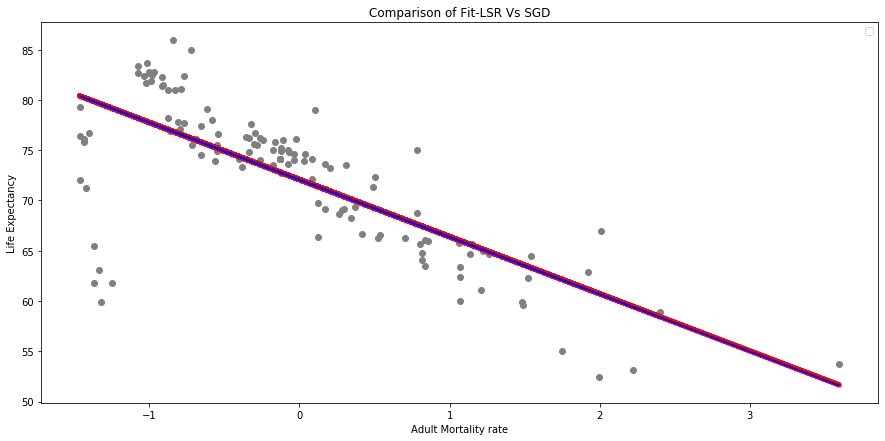

In [30]:
plt.figure(figsize=(15,7))
plt.scatter(X_train,y_train,color='grey')
plt.plot(X_train,LSR_pred,color='Red',linewidth=5)
plt.plot(X_train,sgd_pred,color='blue')
plt.title('Comparison of Fit-LSR Vs SGD')
plt.ylabel('Life Expectancy')
plt.xlabel('Adult Mortality rate')
plt.legend()
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Build a model to analyze the influence of immunization on life expectancy. Use SGD and plot a horizontal multiple barchart to compare the values of beta coefficients with values obtained by the full model build least squares regression.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
df.head()
x=df.iloc[:,[1,5,6]]
y=df['Life_Expectancy']
X_Scaler=StandardScaler()
X=X_Scaler.fit_transform(x)
Y=(y-y.mean())/y.std()

In [32]:
# type your code here

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=0)
## Least Squares Regression model
model=lr.fit(X_train,y_train)
## Least Squares Regression Coefficients
LSR_coef=model.coef_
## SGD Regression model
sgd = SGDRegressor(random_state=1)
linreg_with_SGD = sgd.fit(X_train,y_train)
sgd_pred = linreg_with_SGD.predict(X_train)
## SGD Regression model Coefficients
sgd_coef=linreg_with_SGD.coef_


In [33]:
df_coef=pd.DataFrame([LSR_coef,sgd_coef],index=['LSR_Coef','SGD_coef'],columns=['Diphtheria','Polio','Hepatitis B'])
df_coef

,Diphtheria,Polio,Hepatitis B
LSR_Coef,-0.247122,0.305424,0.545479
SGD_coef,0.056283,0.298238,0.248010


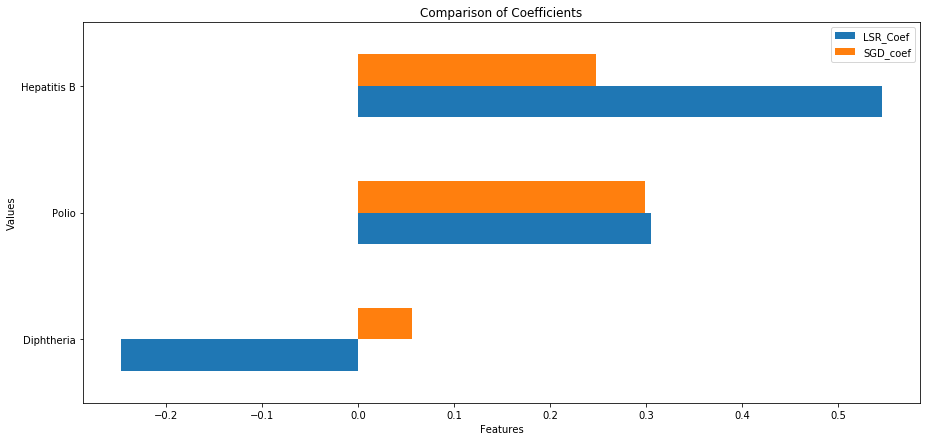

In [34]:
fig=df_coef.T.plot.barh(figsize=(15,7))
plt.title('Comparison of Coefficients')
fig.set_xlabel('Features')
fig.set_ylabel('Values')
plt.xticks(rotation='horizontal')
plt.show()

We observe that the coefficients from SGD have smaller values as compared to the Least Squares Regression method using sklearn.Thus we say that SGD model predicts the expectancy with Higher accuracy than Linear Regression model.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a full model using least squares regression. Check whether the model overfits the training data or not.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [35]:
# type your code here
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
x=df.drop('Life_Expectancy',axis=1)
y=df['Life_Expectancy']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y ,test_size=0.3, random_state=42)
MLR_model=lr.fit(X_train,y_train)

train_pred=MLR_model.predict(X_train)
test_pred=MLR_model.predict(X_test)

In [36]:
from sklearn.metrics import mean_squared_error,r2_score
print("RMSE of Train Data=",np.sqrt(mean_squared_error(y_train,train_pred)))
print("RMSE of Test Data=",np.sqrt(mean_squared_error(y_test,test_pred)))

RMSE of Train Data= 2.6730934623505895
RMSE of Test Data= 3.518260933344802


In [37]:
r_squared=r2_score(y_train,train_pred)
Adj_rsquared=1-((1-r_squared)*(172)/(173-16-1))
print("R-squared value=",r_squared)
print("Adjusted R _squared value =",Adj_rsquared)

R-squared value= 0.8653214966524951
Adjusted R _squared value = 0.8515083168219818


As there is not much difference within the above 2 parameters,we say they are in no way overfitting.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Can we use a linear regression model to analyze how all features from the dataset impact life expectancy?</b>
                </font>
            </div>
        </td>
    </tr>
</table>


To check if Linear Regression model can be used or not,we have to check for the following-

1) Target variable is numeric or not
2) Multicollinearity is present or not

In [38]:
###1)
print("The Datatype of Target variable is ",df['Life_Expectancy'].dtypes)

The Datatype of Target variable is  float64


Hence as it is float we can say that the Target variable is numeric.

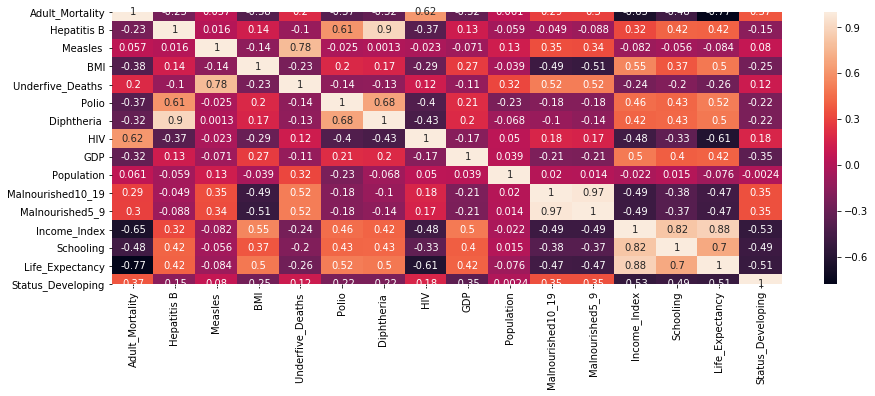

In [39]:
###2)
plt.subplots(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

Here from the heatmaps we can observe the following things-
1) There is high correlation between Hepatitis B & Diphtheria off 0.9
2) There is high correlation between Malnourished10_19 & Malnourished5_9
3) There is high correlation between Income_index,Schooling.

Thus one from each three pairs with highest VIF has to removed for reducing multicollinearity.

Hence before applying Linear Regression model,the above changes have to be made to make the model more effective.

<a id="reg"> </a>
## 4. Regularization

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Can we perform regression analysis without eliminating features involved in multicollinearity detected in question 11?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

No we cannot apply regression analysis as efore applying Linear Regression model,the above changes have to be made to make the model more effective.
Changes being-
From each three pairs with highest VIF,one  has to removed for reducing multicollinearity,can our Linear Regression Analysis can be applied successfully.

Only after removing multicollinearity,can our Linear Regression Analysis can be applied successfully.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Build a model to study the impact of diseases and immunization on life expectancy. Identify the significant variables from the model. Use 'alpha = 1.5' if required.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [40]:
# type your code here
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [41]:
x=df.iloc[:,[1,2,5,6,7]]
y=df['Life_Expectancy']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y ,test_size=0.3, random_state=42)


In [42]:
lasso=Lasso(alpha=1.5)
lasso.fit(X_train,y_train)

Lasso(alpha=1.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [43]:
pd.DataFrame(lasso.coef_,index=x.columns,columns=['Coeft'])

,Coeft
Hepatitis B,-0.007132
Measles,-0.000071
Polio,0.088026
Diphtheria,0.048431
HIV,-1.401424


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Build a model to study the impact of malnutrition and diseases on life expectancy. Identify the insignificant variables from the model. Use 'alpha = 1' if required.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [44]:
# type your code here
x=df.iloc[:,[2,7,11,10]]
y=df['Life_Expectancy']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y ,test_size=0.3, random_state=42)


In [45]:
lasso=Lasso(alpha=1)
lasso.fit(X_train,y_train)


Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [46]:
pd.DataFrame(lasso.coef_,index=x.columns,columns=['Coefts'])

,Coefts
Measles,0.000050
HIV,-2.096439
Malnourished5_9,-0.000000
Malnourished10_19,-0.732203


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Build a full model using the elastic net regression. Use 'alpha = 0.1' and 'l1_ratio=0.001'. Also, compute the RMSE for train and test sets.
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [47]:
# type your code here
x=df.drop(['Life_Expectancy'],axis=1)
y=df['Life_Expectancy']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y ,test_size=0.3, random_state=42)
from sklearn.metrics import r2_score,mean_squared_error

In [48]:
en=ElasticNet(alpha=0.1,l1_ratio=0.001)
en_model=en.fit(X_train,y_train)
en_train_pred=en_model.predict(X_train)
en_test_pred=en_model.predict(X_test)
rmse_en_train=np.sqrt(mean_squared_error(y_train,en_train_pred))
rmse_en_test=np.sqrt(mean_squared_error(y_test,en_test_pred))

C:\Users\AVIRAJ\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 464.7327182441769, tolerance: 0.673804220472441
  positive)


In [49]:
print("RMSE of Train using Elastic net=",rmse_en_train)
print("RMSE of Test using Elastic Net=",rmse_en_test)

RMSE of Train using Elastic net= 3.218426894960911
RMSE of Test using Elastic Net= 3.976861530418637


Here we observe that using Elastic net we have obtained very small difference within the Train & Test data.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Build a full model. Identify the features that are significantly influencing the life expectancy. Use 'alpha = 0.5' if required. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [50]:
# type your code here
x=df.drop(['Life_Expectancy'],axis=1)
y=df['Life_Expectancy']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y ,test_size=0.3, random_state=42)


In [51]:
lasso=Lasso(alpha=0.5)
lasso.fit(X_train,y_train)


Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [52]:
df_Lasso=pd.DataFrame(lasso.coef_,index=x.columns,columns=['Coefts'])
df_Lasso.sort_values(by='Coefts',ascending=False)[0:5]

,Coefts
Schooling,0.507314
BMI,0.081099
Polio,0.037412
Diphtheria,0.026200
GDP,0.000048


<a id="gs"> </a>
## 5. Grid Search 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. If ridge regression is used to build a full model. Which value is the best alpha from the list of values?<br><br>Consider the alpha values: [7,8,9,10,11]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [53]:
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV,ElasticNet,ElasticNetCV

In [54]:
x=df.drop(['Life_Expectancy'],axis=1)
y=df['Life_Expectancy']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y ,test_size=0.3, random_state=42)

In [55]:
# type your code here
ridge=Ridge()
parameters=[{'alpha':[7,8,9,10,11]}]
ridge_grid=GridSearchCV(ridge,param_grid=parameters,cv=5)
ridge_grid.fit(X_train,y_train)

NameError: name 'GridSearchCV' is not defined

In [ ]:
ridge_grid.best_params_

### RidgeCV method

In [57]:
ridgecv=RidgeCV(alphas=[7,8,9,10,11],cv=5)
ridgecv.fit(X_train,y_train)



C:\Users\AVIRAJ\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.3323e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\AVIRAJ\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.17734e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\AVIRAJ\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.89677e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\AVIRAJ\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.40372e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\AVIRAJ\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.47669e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\AVIRAJ\Anaconda3\lib\site-packages\sklearn\linear_mo

RidgeCV(alphas=array([ 7,  8,  9, 10, 11]), cv=5, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [58]:
ridgecv.alpha_

7

We also get Best alpha as 7 from this method

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. If lasso regression is used to build a full model. Which value is the best alpha from the list of values?<br><br>Consider the alpha values: [7,8,9,10,11]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [59]:
# type your code here
from sklearn.model_selection import GridSearchCV,KFold
x=df.drop(['Life_Expectancy'],axis=1)
y=df['Life_Expectancy']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y ,test_size=0.3, random_state=42)

In [60]:
lasso=Lasso()
parameters=[{'alpha':[7,8,9,10,11]}]
lasso_grid=GridSearchCV(lasso,param_grid=parameters,cv=3)
lasso_grid.fit(X_train,y_train)

C:\Users\AVIRAJ\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None, param_grid=[{'alpha': [7, 8, 9, 10, 11]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [61]:
lasso_grid.best_params_

{'alpha': 11}

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Perform regression analysis to study the impact of malnutrition and diseases on life expectancy. Determine the optimal value of alpha and mixing parameter if elastic net regression is used to build the model. Consider the following list of values:<br><br> alpha : [0.1,0.5,1,1.5,2,2.5,3,3.5,4]<br> l1_ratio : [0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9] </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [62]:
# type your code here
# type your code here
from sklearn.model_selection import GridSearchCV,KFold
x=df.iloc[:,[2,7,10,11]]
y=df['Life_Expectancy']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y ,test_size=0.3, random_state=42)

In [63]:
enet=ElasticNet()
parameters=[{'alpha':[0.1,0.5,1,1.5,2,2.5,3,3.5,4],'l1_ratio':[0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]}]
enet_grid=GridSearchCV(enet,param_grid=parameters,cv=3)
enet_grid.fit(X_train,y_train)

C:\Users\AVIRAJ\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8535124055983943, tolerance: 0.47572317647058826
  positive)
C:\Users\AVIRAJ\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.3575122365591596, tolerance: 0.47572317647058826
  positive)
C:\Users\AVIRAJ\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.794131979213034, tolerance: 0.47572317647058826
  positive)
C:\Users\AVIRAJ\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': [0.1, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4],
                          'l1_ratio': [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8,
                                       0.85, 0.9]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [64]:
enet_grid.best_params_

{'alpha': 0.5, 'l1_ratio': 0.9}

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Build a full model. Select the optimal value for elastic net mixing parameter if the alpha value is 0.8<br><br>Consider the values: l1_ratio : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [65]:
# type your code here
from sklearn.model_selection import GridSearchCV,KFold
x=df.drop(['Life_Expectancy'],axis=1)
y=df['Life_Expectancy']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y ,test_size=0.3, random_state=42)

In [66]:
enet=ElasticNet()
parameters=[{'alpha':[0.8],'l1_ratio':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]}]
enet_grid=GridSearchCV(enet,param_grid=parameters,cv=3)
enet_grid.fit(X_train,y_train)

C:\Users\AVIRAJ\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': [0.8],
                          'l1_ratio': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [67]:
enet_grid.best_params_

{'alpha': 0.8, 'l1_ratio': 0.001}